In [1]:
from pymongo import MongoClient
from bson.son import SON
from textblob import TextBlob
from dateutil import parser
import pymongo
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

client = MongoClient("52.25.140.201",27017)
db = client['ProjectCorruption']
coll_parsed = db['Parsed_Articles']

In [2]:
from_year = '01/01/2014'
to_year = '12/31/2014'
from_year_d = parser.parse(from_year)
to_year_d = parser.parse(to_year)

In [123]:
from bson.son import SON

print from_year_d
print to_year_d
print type(from_year_d)
print type(to_year_d)

pipeline = [{"$unwind": "$names"},
            {"$match": {"date": {"$gte":from_year_d}, "date": {"$lte":to_year_d}}},\
            {"$group": {"_id": {"source":"$source", "name":"$names",},\
                                "totkeywords": {"$sum": "$tot_keywords"}}}]


output_list2 = coll_parsed.aggregate(pipeline)

print output_list
# output_list = coll_parsed.find({})

#for each in output_list.result:
#    print each['source']+"-"+each['name']+str(each['totkeywords'])

2014-01-01 00:00:00
2014-12-31 00:00:00
<type 'datetime.datetime'>
<type 'datetime.datetime'>


AutoReconnect: [Errno 60] Operation timed out

In [31]:
from bson.son import SON

print from_year_d
print to_year_d
print type(from_year_d)
print type(to_year_d)

pipeline = [{"$unwind": "$names"},
            {"$match": {"date": {"$gte":from_year_d}, "date": {"$lte":to_year_d}}},\
            {"$group": {"_id": {"source":"$source", "name":"$names", "month": {"$month": "$date"}},\
                                "totkeywords": {"$sum": "$tot_keywords"}}}]


output_list = coll_parsed.aggregate(pipeline)

print output_list
# output_list = coll_parsed.find({})

#for each in output_list.result:
#    print each['source']+"-"+each['name']+str(each['totkeywords'])

2014-01-01 00:00:00
2014-12-31 00:00:00
<type 'datetime.datetime'>
<type 'datetime.datetime'>
{u'ok': 1.0, u'result': [{u'totkeywords': 2, u'_id': {u'source': u'Perfil', u'name': u'Siemens', u'month': 11}}, {u'totkeywords': 6, u'_id': {u'source': u'TA', u'name': u'Vido', u'month': 7}}, {u'totkeywords': 1, u'_id': {u'source': u'Infobae', u'name': u'Macri', u'month': 5}}, {u'totkeywords': 0, u'_id': {u'source': u'Perfil', u'name': u'Clarin', u'month': 4}}, {u'totkeywords': 0, u'_id': {u'source': u'LaNacion', u'name': u'Grondona', u'month': 5}}, {u'totkeywords': 1, u'_id': {u'source': u'Infobae', u'name': u'Capitanich', u'month': 8}}, {u'totkeywords': 0, u'_id': {u'source': u'TA', u'name': u'Randazzo', u'month': 5}}, {u'totkeywords': 0, u'_id': {u'source': u'Infobae', u'name': u'Vandenbroele', u'month': 9}}, {u'totkeywords': 0, u'_id': {u'source': u'Infobae', u'name': u'Lijo', u'month': 9}}, {u'totkeywords': 0, u'_id': {u'source': u'Infobae', u'name': u'FIFA', u'month': 8}}, {u'totkeyword

In [32]:

print coll_parsed.find({"date": {"$gte":from_year_d}, "date": {"$lte":to_year_d}}).count()


8402


In [33]:
a = output_list['result']
print a

[{u'totkeywords': 2, u'_id': {u'source': u'Perfil', u'name': u'Siemens', u'month': 11}}, {u'totkeywords': 6, u'_id': {u'source': u'TA', u'name': u'Vido', u'month': 7}}, {u'totkeywords': 1, u'_id': {u'source': u'Infobae', u'name': u'Macri', u'month': 5}}, {u'totkeywords': 0, u'_id': {u'source': u'Perfil', u'name': u'Clarin', u'month': 4}}, {u'totkeywords': 0, u'_id': {u'source': u'LaNacion', u'name': u'Grondona', u'month': 5}}, {u'totkeywords': 1, u'_id': {u'source': u'Infobae', u'name': u'Capitanich', u'month': 8}}, {u'totkeywords': 0, u'_id': {u'source': u'TA', u'name': u'Randazzo', u'month': 5}}, {u'totkeywords': 0, u'_id': {u'source': u'Infobae', u'name': u'Vandenbroele', u'month': 9}}, {u'totkeywords': 0, u'_id': {u'source': u'Infobae', u'name': u'Lijo', u'month': 9}}, {u'totkeywords': 0, u'_id': {u'source': u'Infobae', u'name': u'FIFA', u'month': 8}}, {u'totkeywords': 0, u'_id': {u'source': u'TA', u'name': u'Menem', u'month': 6}}, {u'totkeywords': 0, u'_id': {u'source': u'Infobae'

In [34]:
b = pd.DataFrame(a)

In [35]:
print b.head()

                                                 _id  totkeywords
0  {u'source': u'Perfil', u'name': u'Siemens', u'...            2
1  {u'source': u'TA', u'name': u'Vido', u'month': 7}            6
2  {u'source': u'Infobae', u'name': u'Macri', u'm...            1
3  {u'source': u'Perfil', u'name': u'Clarin', u'm...            0
4  {u'source': u'LaNacion', u'name': u'Grondona',...            0


In [42]:
print b['_id'][0]['source']

Perfil


In [50]:
for each in range(len(b)):
    print b['_id'][each]['source']+"-"+b['_id'][each]['name']+" - "+str(b['totkeywords'][each])+\
    " Month: "+str(b['_id'][each]['month'])

Perfil-Siemens - 2 Month: 11
TA-Vido - 6 Month: 7
Infobae-Macri - 1 Month: 5
Perfil-Clarin - 0 Month: 4
LaNacion-Grondona - 0 Month: 5
Infobae-Capitanich - 1 Month: 8
TA-Randazzo - 0 Month: 5
Infobae-Vandenbroele - 0 Month: 9
Infobae-Lijo - 0 Month: 9
Infobae-FIFA - 0 Month: 8
TA-Menem - 0 Month: 6
Infobae-Leoz - 0 Month: 1
Clarin-Oyarbide - 0 Month: 2
Ambito-Cavallo - 0 Month: 8
Ambito-Menem - 0 Month: 3
Ambito-Vido - 0 Month: 5
Clarin-Dilma - 0 Month: 6
Clarin-Vido - 1 Month: 1
LaNacion-Cavallo - 1 Month: 1
Infobae-FIFA - 0 Month: 9
Infobae-Bonadio - 2 Month: 8
Infobae-Vandenbroele - 0 Month: 1
Infobae-China - 0 Month: 5
Pagina12-Blatter - 0 Month: 9
Pagina12-AFA - 0 Month: 10
Pagina12-AFA - 3 Month: 6
Perfil-Manzur - 0 Month: 6
TA-Oyarbide - 0 Month: 4
TA-Vandenbroele - 0 Month: 12
TA-Boudou - 4 Month: 8
TA-Randazzo - 4 Month: 8
TA-SIDE - 0 Month: 9
Clarin-Abal - 0 Month: 10
LaNacion-Bonadio - 2 Month: 6
LaNacion-Larreta - 1 Month: 11
LaNacion-Blatter - 1 Month: 10
TA-Vido - 0 Month

In [61]:
aggreg_list = []

print b['_id'][0]['source']
for each in range(len(b)):
    source = b['_id'][each]['source']
    name = b['_id'][each]['name']
    month = b['_id'][each]['month']
    totkey = b['totkeywords'][each]
    aggreg_list.append([source,name,month,totkey])

df_columns = ['source','name','month','total']
df_aggreg = pd.DataFrame(aggreg_list,columns=df_columns)


Perfil


In [62]:
print df_aggreg.head()

     source      name  month  total
0    Perfil   Siemens     11      2
1        TA      Vido      7      6
2   Infobae     Macri      5      1
3    Perfil    Clarin      4      0
4  LaNacion  Grondona      5      0


In [64]:
df_sorted = df_aggreg.sort('month')

In [65]:
print df_sorted

        source          name  month  total
1686  Pagina12         Macri      1     13
313     Perfil       Bonadio      1      2
1266  LaNacion      Kirchner      1     37
1264  LaNacion       Siemens      1      6
1259  LaNacion        Maduro      1      2
1255    Perfil     Venezuela      1      2
330     Perfil        Maduro      1      1
1244  LaNacion          SIDE      1      2
1236  LaNacion        enador      1      3
342     Perfil  Vandenbroele      1      0
354    Infobae         China      1      0
310     Ambito        Boudou      1      0
1202    Clarin       Blatter      1      1
1180    Clarin     Venezuela      1      9
1176    Clarin      Szpolski      1      0
390     Perfil      Randazzo      1      1
391     Perfil          Lijo      1      1
1150  LaNacion         Menem      1     13
1140  Pagina12           AFA      1      6
408     Perfil         Menem      1      1
409   Pagina12          Lijo      1     10
411   Pagina12       Siemens      1     10
1130    Cla

In [74]:
person = df_sorted['name'].unique()
source = df_sorted['source'].unique()
print source
print person

[u'Pagina12' u'Perfil' u'LaNacion' u'Infobae' u'Ambito' u'Clarin' u'TA']
[u'Macri' u'Bonadio' u'Kirchner' u'Siemens' u'Maduro' u'Venezuela' u'SIDE'
 u'enador' u'Vandenbroele' u'China' u'Boudou' u'Blatter' u'Szpolski'
 u'Randazzo' u'Lijo' u'Menem' u'AFA' u'Capitanich' u'Vido' u'Kicillof'
 u'Manzur' u'Barrionuevo' u'Grondona' u'Lula' u'Dilma' u'Abal' u'Cavallo'
 u'IBM' u'iputad' u'Posse' u'FIFA' u'Oyarbide' u'Alak' u'Leoz' u'Larreta'
 u'Havelange' u'Pontaquarto' u'Maximo' u'Biomet' u'Clarin' u'Baez'
 u'Insfran' u'Skanka' u'Campora' u'Niembro' u'Anibal']


In [70]:
print df_sorted['name'].unique()

[u'Macri' u'Bonadio' u'Kirchner' u'Siemens' u'Maduro' u'Venezuela' u'SIDE'
 u'enador' u'Vandenbroele' u'China' u'Boudou' u'Blatter' u'Szpolski'
 u'Randazzo' u'Lijo' u'Menem' u'AFA' u'Capitanich' u'Vido' u'Kicillof'
 u'Manzur' u'Barrionuevo' u'Grondona' u'Lula' u'Dilma' u'Abal' u'Cavallo'
 u'IBM' u'iputad' u'Posse' u'FIFA' u'Oyarbide' u'Alak' u'Leoz' u'Larreta'
 u'Havelange' u'Pontaquarto' u'Maximo' u'Biomet' u'Clarin' u'Baez'
 u'Insfran' u'Skanka' u'Campora' u'Niembro' u'Anibal']


In [67]:
import seaborn as sns
import pylab as P

hmp_name = df_sorted['name']
hmp_source = df_sorted['source']
hmp_total = df_sorted['total']

frames = [hmp_name, hmp_source, hmp_total]

to_graph = pd.concat(frames, axis = 1)

In [68]:
print to_graph

              name    source  total
1686         Macri  Pagina12     13
313        Bonadio    Perfil      2
1266      Kirchner  LaNacion     37
1264       Siemens  LaNacion      6
1259        Maduro  LaNacion      2
1255     Venezuela    Perfil      2
330         Maduro    Perfil      1
1244          SIDE  LaNacion      2
1236        enador  LaNacion      3
342   Vandenbroele    Perfil      0
354          China   Infobae      0
310         Boudou    Ambito      0
1202       Blatter    Clarin      1
1180     Venezuela    Clarin      9
1176      Szpolski    Clarin      0
390       Randazzo    Perfil      1
391           Lijo    Perfil      1
1150         Menem  LaNacion     13
1140           AFA  Pagina12      6
408          Menem    Perfil      1
409           Lijo  Pagina12     10
411        Siemens  Pagina12     10
1130         Menem    Clarin      4
1190        Maduro  Pagina12      6
419         enador    Perfil      7
1283    Capitanich  LaNacion      3
1301          Vido  LaNacion

In [75]:
person = to_graph['name'].unique()
source = to_graph['source'].unique()

print person
print source

[u'Macri' u'Bonadio' u'Kirchner' u'Siemens' u'Maduro' u'Venezuela' u'SIDE'
 u'enador' u'Vandenbroele' u'China' u'Boudou' u'Blatter' u'Szpolski'
 u'Randazzo' u'Lijo' u'Menem' u'AFA' u'Capitanich' u'Vido' u'Kicillof'
 u'Manzur' u'Barrionuevo' u'Grondona' u'Lula' u'Dilma' u'Abal' u'Cavallo'
 u'IBM' u'iputad' u'Posse' u'FIFA' u'Oyarbide' u'Alak' u'Leoz' u'Larreta'
 u'Havelange' u'Pontaquarto' u'Maximo' u'Biomet' u'Clarin' u'Baez'
 u'Insfran' u'Skanka' u'Campora' u'Niembro' u'Anibal']
[u'Pagina12' u'Perfil' u'LaNacion' u'Infobae' u'Ambito' u'Clarin' u'TA']


In [117]:
scores = pd.DataFrame(0,columns=person, index=source)

print scores

          Macri  Bonadio  Kirchner  Siemens  Maduro  Venezuela  SIDE  enador  \
Pagina12      0        0         0        0       0          0     0       0   
Perfil        0        0         0        0       0          0     0       0   
LaNacion      0        0         0        0       0          0     0       0   
Infobae       0        0         0        0       0          0     0       0   
Ambito        0        0         0        0       0          0     0       0   
Clarin        0        0         0        0       0          0     0       0   
TA            0        0         0        0       0          0     0       0   

          Vandenbroele  China   ...    Pontaquarto  Maximo  Biomet  Clarin  \
Pagina12             0      0   ...              0       0       0       0   
Perfil               0      0   ...              0       0       0       0   
LaNacion             0      0   ...              0       0       0       0   
Infobae              0      0   ...            

In [118]:
for index in range(len(to_graph)):
    nm = to_graph['name'][index]
    sr = to_graph['source'][index]
    scores[str(nm)][str(sr)] = to_graph['total'][index]

In [119]:
print scores

          Macri  Bonadio  Kirchner  Siemens  Maduro  Venezuela  SIDE  enador  \
Pagina12     13       13        31        2       6         25    19      55   
Perfil        6        2        48        8       1         16     5      23   
LaNacion     20       10        95       39       9          6     5      14   
Infobae       3        1         4        5       8         30     5      18   
Ambito        0        1         0        0       0          0     0       2   
Clarin        2        0         0        8       1          4     2      13   
TA            0        4         4        0       0          2     3       3   

          Vandenbroele  China   ...    Pontaquarto  Maximo  Biomet  Clarin  \
Pagina12             3      8   ...              1       0       0       0   
Perfil               3      1   ...             13       0       0       2   
LaNacion             2      1   ...             10       0       0       3   
Infobae              0      1   ...            

In [101]:
venezuela = scores[5:6]
print venezuela


           Pagina12  Perfil  LaNacion  Infobae  Ambito  Clarin  TA
Venezuela        25      16         6       30       0       4   2


In [102]:
blatter = scores[0:1]
print blatter

       Pagina12  Perfil  LaNacion  Infobae  Ambito  Clarin  TA
Macri        13       6        20        3       0       2   0


In [107]:
scores.head()

,Pagina12,Perfil,LaNacion,Infobae,Ambito,Clarin,TA
Macri,13,6,20,3,0,2,0
Bonadio,13,2,10,1,1,0,4
Kirchner,31,48,95,4,0,0,4
Siemens,2,8,39,5,0,8,0
Maduro,6,1,9,8,0,1,0


In [110]:
test = scores[0:2]
print test

         Pagina12  Perfil  LaNacion  Infobae  Ambito  Clarin  TA
Macri          13       6        20        3       0       2   0
Bonadio        13       2        10        1       1       0   4


In [114]:
corr = test.corr('pearson')

print corr

          Pagina12  Perfil  LaNacion  Infobae  Ambito  Clarin  TA
Pagina12       NaN     NaN       NaN      NaN     NaN     NaN NaN
Perfil         NaN       1         1        1      -1       1  -1
LaNacion       NaN       1         1        1      -1       1  -1
Infobae        NaN       1         1        1      -1       1  -1
Ambito         NaN      -1        -1       -1       1      -1   1
Clarin         NaN       1         1        1      -1       1  -1
TA             NaN      -1        -1       -1       1      -1   1


In [120]:
corr2 = scores.corr('pearson')
print corr2

                 Macri   Bonadio  Kirchner   Siemens    Maduro  Venezuela  \
Macri         1.000000  0.825625  0.906326  0.797786  0.742732   0.217349   
Bonadio       0.825625  1.000000  0.613812  0.389929  0.560613   0.241467   
Kirchner      0.906326  0.613812  1.000000  0.874238  0.558466   0.032623   
Siemens       0.797786  0.389929  0.874238  1.000000  0.607438  -0.143847   
Maduro        0.742732  0.560613  0.558466  0.607438  1.000000   0.592733   
Venezuela     0.217349  0.241467  0.032623 -0.143847  0.592733   1.000000   
SIDE          0.536339  0.801612  0.242806 -0.061451  0.452730   0.644642   
enador        0.505049  0.674777  0.234730 -0.067812  0.422154   0.709860   
Vandenbroele  0.094820 -0.025166  0.028926  0.111437 -0.193382  -0.142178   
China         0.169515  0.572204 -0.138337 -0.295114  0.032142   0.252158   
Boudou        0.882351  0.574395  0.904856  0.963909  0.706814  -0.052664   
Blatter       0.782786  0.433998  0.848977  0.977016  0.599856  -0.218910   

([<matplotlib.axis.YTick at 0x10f2d3a50>,
 <a list of 46 Text yticklabel objects>)

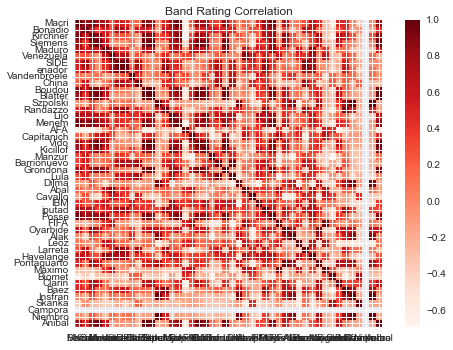

In [124]:
plt.imshow(corr2,cmap='Reds',interpolation='none')
plt.colorbar()
plt.title("Band Rating Correlation ")
plt.xticks(range(len(corr2)), corr2.columns)
plt.yticks(range(len(corr2)), corr2.columns)